In [1]:
%matplotlib inline
from scipy.integrate import odeint  
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import LineString

In [2]:
def sdot_repressor(s,t,params):
    
    # variables and parameters
    P, Pr = s
    kp, kdp, K, n = params
    
    # rate equations in the presence of repressor
    rate_P_production = kp * ((K**n)/(Pr**n + K**n))
    rate_P_loss = -kdp*P
    dP = rate_P_production + rate_P_loss
    dPr = 0
    dsdt = [dP, dPr]
    
    return dsdt

Protein copies without repressor is 7200.0 and with repressor is 57.85140363059221


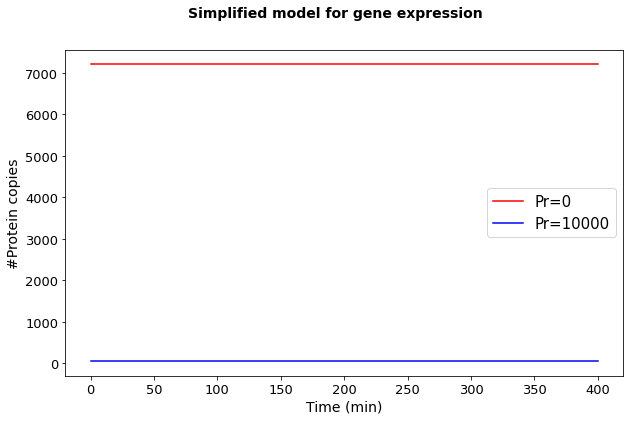

In [3]:
# Define parameters' values
kp = 120.0
K = 3000.0
n = 4.0
kdp = 1.0/60.0
params = [kp, kdp, K, n]

# Define list of observation points 't_obs'
t_start = 0
t_end = 400
n_obs = 1000
t_obs = np.linspace(t_start, t_end, n_obs)

# Define initial conditions for Pr = 0 (repressor absent)
# Use the odeint function to simulate system
# and unpack s_obs1 (repressor absent) into variable observations

P = kp/kdp
Pr = 0
s0 = [P, Pr]

s_obs1 = odeint(sdot_repressor, s0, t_obs, args=(params,))

P_obs1 = s_obs1[:,0]
Pr_obs1 = s_obs1[:,1]

# Define initial conditions for Pr = 10000 (repressor at high level)
# Use the odeint function to simulate system
# Unpack s_obs2 (with repressor) into variable observations

P = kp * ((K**n)/(((10000**n + K**n))*(kdp)))
Pr = 10000
s0 = [P, Pr]

s_obs2 = odeint(sdot_repressor, s0, t_obs, args=(params,))

P_obs2 = s_obs2[:,0]

# {lot results
fig1 = plt.figure(figsize=(10,6))
fig1.suptitle('Simplified model for gene expression', fontsize=14, fontweight='bold')

ax = fig1.add_subplot(1,1,1)
ax.plot(t_obs, P_obs1, 'r-', label='Pr=0')
ax.plot(t_obs, P_obs2, 'b-', label='Pr=10000')
ax.set_xlabel('Time (min)')
ax.set_ylabel('#Protein copies')
ax.legend(prop={'size': 15})
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

# Calculate the steady state values of P 
print(f"Protein copies without repressor is {P_obs1[-1]} and with repressor is {P_obs2[-1]}")

# Save figure in png
plt.savefig('fig1.png');